In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/*.csv')
files[:10]

['../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-17-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-31-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-01-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-11-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-13-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-05-2020.csv']

In [3]:
pd.read_csv(files[-2])

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-10T23:33:02,31728,974,2222
1,Guangdong,Mainland China,2020-02-10T13:43:02,1159,1,167
2,Zhejiang,Mainland China,2020-02-10T14:13:12,1092,0,242
3,Henan,Mainland China,2020-02-10T13:53:02,1073,6,191
4,Hunan,Mainland China,2020-02-10T13:53:02,879,1,208
...,...,...,...,...,...,...
67,"Los Angeles, CA",US,2020-02-01T19:53:03,1,0,0
68,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
69,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
70,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


In [4]:
df = pd.concat([pd.read_csv(f) for f in files], sort=False)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,NaN,Thailand,1/24/20 17:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,South Korea,1/24/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,Singapore,1/24/20 17:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,Vietnam,1/24/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


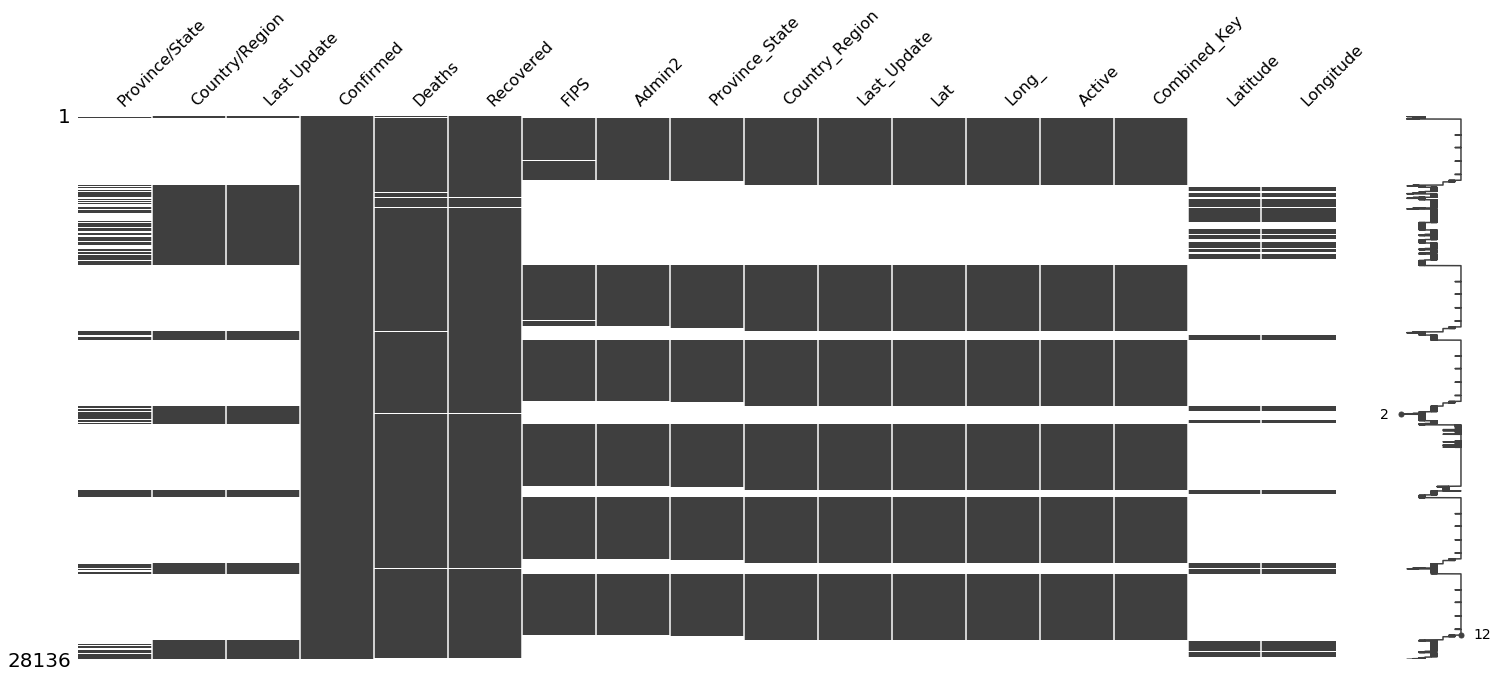

In [12]:
import missingno as msno
msno.matrix(df)

In [23]:
df['Country'] = df['Country/Region']

In [25]:
br = df.query("Country == 'Brazil'")

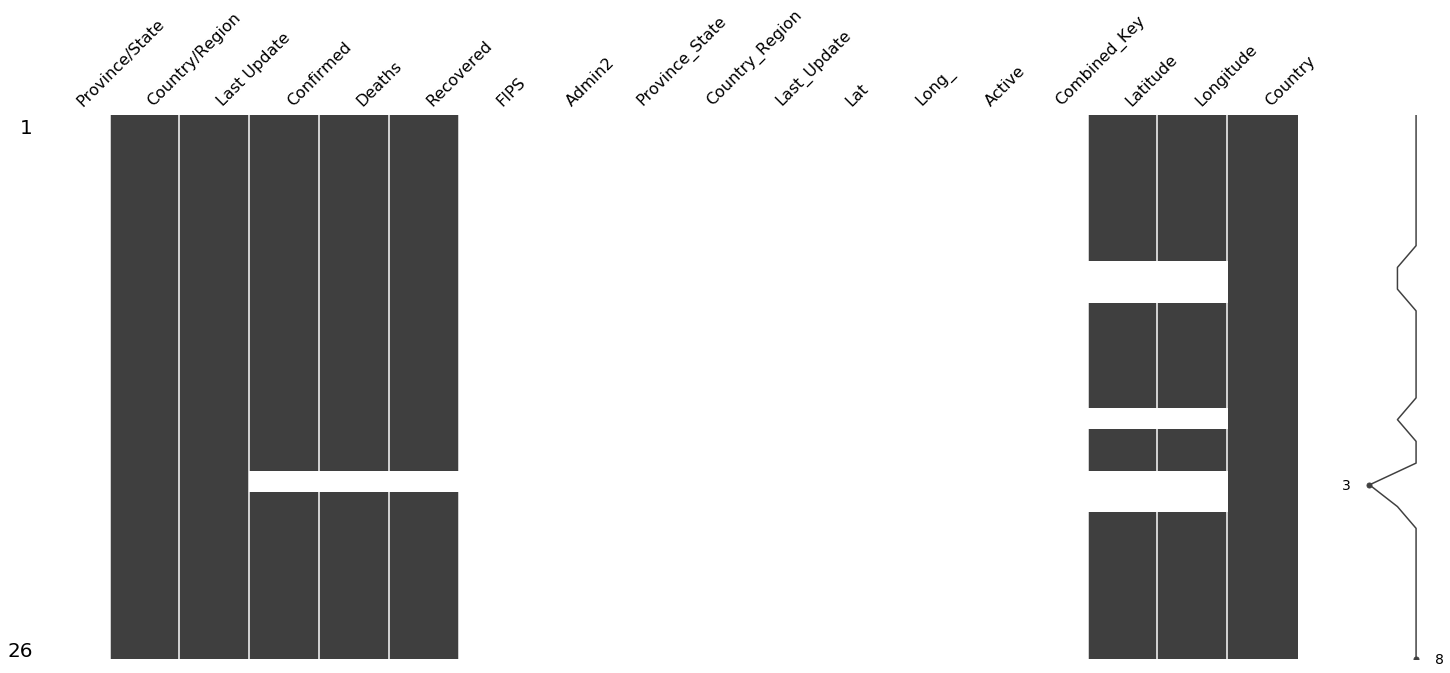

In [26]:
msno.matrix(br)

In [27]:
br.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Active',
       'Combined_Key', 'Latitude', 'Longitude', 'Country'],
      dtype='object')

In [28]:
br = br[['Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Country']]

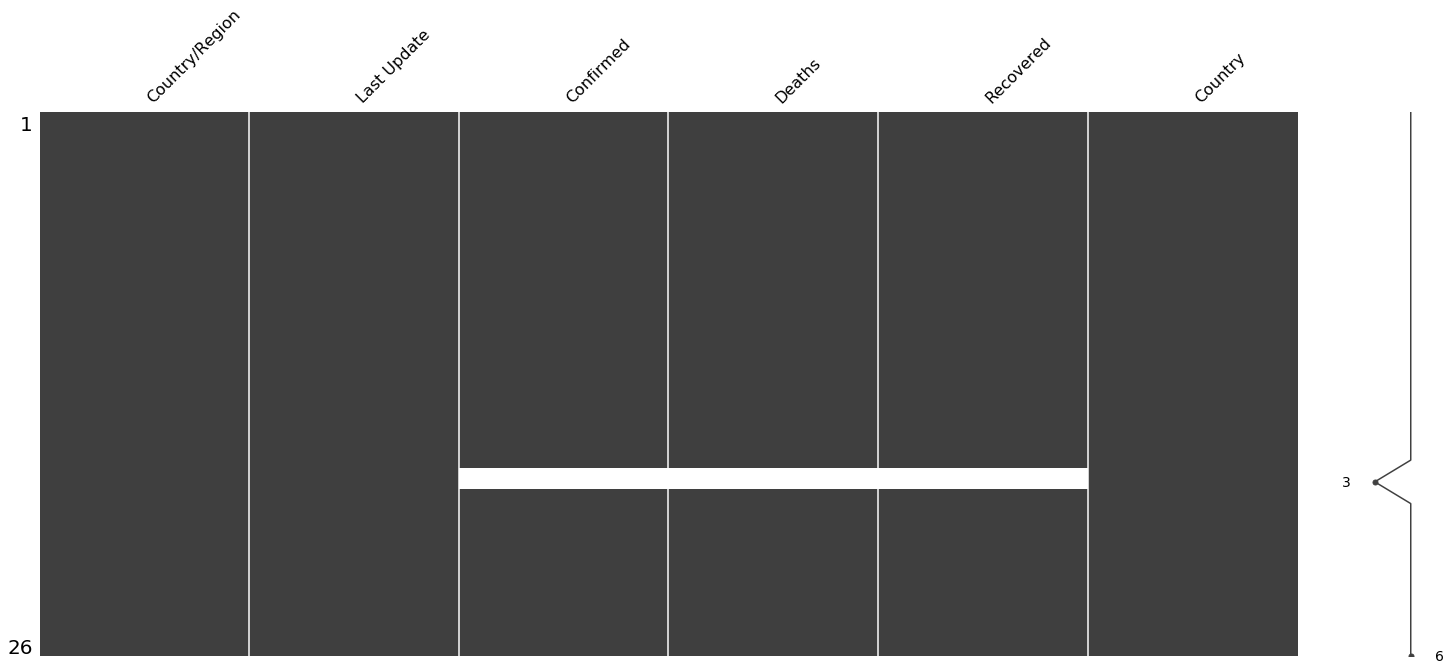

In [29]:
msno.matrix(br)

In [39]:
br = br.set_index('Last Update').sort_index().iloc[1:]
br

,Country/Region,Confirmed,Deaths,Recovered,Country
Last Update,,,,,
2020-02-26T23:53:02,Brazil,1.0,0.0,0.0,Brazil
2020-02-26T23:53:02,Brazil,1.0,0.0,0.0,Brazil
2020-02-26T23:53:02,Brazil,1.0,0.0,0.0,Brazil
2020-02-29T21:03:05,Brazil,2.0,0.0,0.0,Brazil
2020-02-29T21:03:05,Brazil,2.0,0.0,0.0,Brazil
2020-02-29T21:03:05,Brazil,2.0,0.0,0.0,Brazil
2020-02-29T21:03:05,Brazil,2.0,0.0,0.0,Brazil
2020-03-04T20:33:02,Brazil,4.0,0.0,0.0,Brazil
2020-03-04T20:33:02,Brazil,4.0,0.0,0.0,Brazil


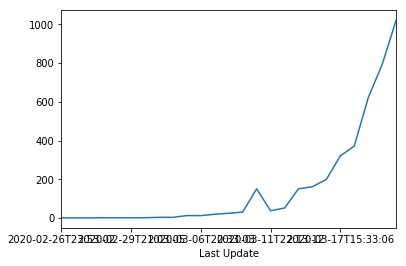

In [40]:
br.Confirmed.plot()

In [45]:
br['New'] = br.Confirmed
br['Total'] = br.Confirmed.cumsum()

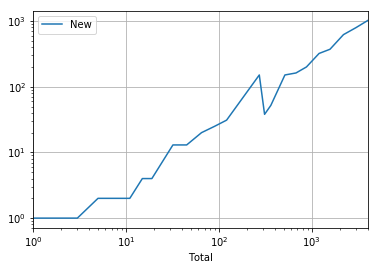

In [50]:
br.plot('Total', 'New', logx=True, logy=True, grid=True);

## Exponencial linearizada

Acima temos a exponencial linearizada como mostrada pelo aatishb/covidtrends. Agora vou tentar analizar temporalmente a "transmissividade" do virus. medindo o quanto ele avança quando levamos em conta essas duas grandezas. 

In [58]:
br['log_New'] = np.log(br['New'])
br['log_Total'] = np.log(br['Total'])

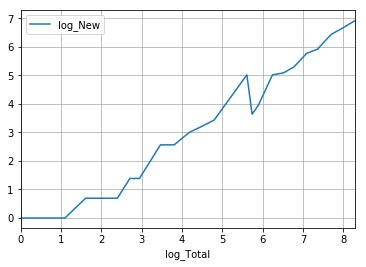

In [59]:
br.plot('log_Total', 'log_New',grid=True);

In [92]:
def euclidean(p1, p2):
    return np.sqrt(
        np.square(p2['log_Total'] - p1['log_Total']) + np.square(p1['log_New'] - p1['log_New'])
    )

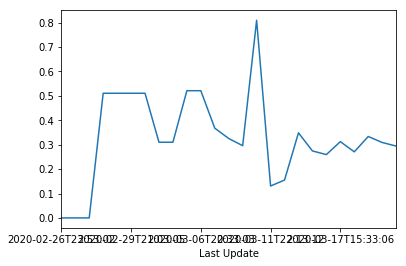

In [98]:
logs = br[['log_Total', 'log_New']]
infectancia = [0]
for i in range(1, len(br)):
    p1, p2 = logs.iloc[i - 1], logs.iloc[i]
    
    distance = euclidean(p1, p2)
    delta_t = pd.Timestamp(p2.name) - pd.Timestamp(p1.name)
    if delta_t == pd.Timedelta(0):
        infectancia.append(infectancia[-1])
    else:
        infectancia.append(distance)

br['Infect'] = infectancia
br.Infect.plot();
